# Install Packages

In [307]:
#pip install wordcloud
#pip install emoji
#pip install textblob
#pip install spacy

# Import Libraries

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import spacy

# Load data

In [309]:
# read file
data=pd.read_csv('TweetExporter-BBCBreaking-200-tweets.csv',encoding='ISO-8859-1')

# Inspect data

In [310]:
data.shape

(200, 20)

In [311]:
data.head(5)

,"ï»¿""Tweet ID""",Tweet Text,Type,Author Name,Author Username,Creation Time,Reply Count,Retweet Count,Quote Count,Like Count,View Count,Bookmark Count,Language,Possibly Sensitive,Source,Hashtags,Tweet URL,Media Type,Media URLs,External URLs
0,"=""1829139390901215250""",Woman who stole mobility scooter and left disa...,Tweet,BBC Breaking News,BBCBreaking,"29/8/2024, 6:19:49 pm",194,124,39,582,268510,33,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1829139390901...,NaN,NaN,https://bbc.in/47achZR
1,"=""1828889219000926333""",Telegram chief Pavel Durov placed under formal...,Tweet,BBC Breaking News,BBCBreaking,"29/8/2024, 1:45:43 am",149,157,17,585,325265,28,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828889219000...,NaN,NaN,https://bbc.in/4dAYL3U
2,"=""1828748677566865444""",At least nine Palestinians killed as Israel la...,Tweet,BBC Breaking News,BBCBreaking,"28/8/2024, 4:27:15 pm",236,168,18,299,303710,18,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828748677566...,NaN,NaN,https://bbc.in/478L0Hd
3,"=""1828471948101251257""",Two men charged with four counts of murder and...,Tweet,BBC Breaking News,BBCBreaking,"27/8/2024, 10:07:38 pm",0,81,17,314,329494,18,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828471948101...,NaN,NaN,https://bbc.in/3XlqMqE
4,"=""1828415564307403177""",Israel says it has rescued a hostage being hel...,Tweet,BBC Breaking News,BBCBreaking,"27/8/2024, 6:23:35 pm",192,99,12,616,311600,10,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828415564307...,NaN,NaN,https://bbc.in/3MHrVml


In [312]:
# excluding unwanted columns
columnsToRemove = ['ï»¿"Tweet ID"', 'Type', 'Author Name', 'Author Username', 'Creation Time', 'Quote Count',
    'Bookmark Count', 'Language', 'Possibly Sensitive', 'Source', 'Hashtags',
    'Tweet URL', 'Media Type', 'Media URLs', 'External URLs']
data.drop(columns=columnsToRemove, inplace=True)

In [231]:
data.head(5)

,Tweet Text,Reply Count,Retweet Count,Like Count,View Count
0,Woman who stole mobility scooter and left disa...,194,124,582,268510
1,Telegram chief Pavel Durov placed under formal...,149,157,585,325265
2,At least nine Palestinians killed as Israel la...,236,168,299,303710
3,Two men charged with four counts of murder and...,0,81,314,329494
4,Israel says it has rescued a hostage being hel...,192,99,616,311600


# Text Preprocessing

In [232]:
#missing values
data.isnull().sum()

Tweet Text       0
Reply Count      0
Retweet Count    0
Like Count       0
View Count       0
dtype: int64

### Cleaning tweet text

In [233]:
def cleanTweet(text):
    text = re.sub(r'https?://\S+', '', text)# remove url
    text = re.sub(r'#','',text) # remove #
    text = re.sub(r'[:",-]', ' ', text) # remove :,",- and ,
    text = re.sub(r'\s+',' ',text).strip()#remove extra whitespace:
    patterns = ["follow live", "Watch and","read more","watch live",
                "follow updates","live updates"]# remove pattern,emoji
    for pattern in patterns:
        text = re.sub(pattern, ' ', text, flags=re.IGNORECASE)
        text = emoji.replace_emoji(text, replace=' ')
    return text
data['Tweet Text']=data['Tweet Text'].apply(cleanTweet)

### Removing stop words

In [234]:
# data download
nltk.download('stopwords')
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [235]:
#list of stop words
stopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [236]:
#function
def removeStopWords(text):
    wordTokens = word_tokenize(text)
    filteredSentence = [word for word in wordTokens if word.lower() not in stopWords]
    text = ' '.join(filteredSentence)
    return text
data['Tweet Text']=data['Tweet Text'].apply(removeStopWords)

### Remove entities

In [237]:
# downloding package
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 871.5 kB/s eta 0:00:15
     - -------------------------------------- 0.6/12.8 MB 4.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/12.8 MB 9.8 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 11.8 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.8 MB 13.4 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.8 MB 15.6 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8 MB 15.0 MB/s eta 0:00:01
     ------------------- -------------------- 6.2/12.8 MB 15.2 MB/s eta 0:00:01
     -------------------- ------------------- 6.5/12.8 MB 14.8 MB/s eta 0:00:01
     ---------------------- ----------------- 7.2/12.8 MB 14.4 MB/s eta 0:00:01
     ------------------------- -------------- 8.2/

In [238]:
nlp = spacy.load("en_core_web_sm")
def remove_entities(text):
    try:
        # Process the text with SpaCy
        doc = nlp(text)
        # Remove named entities
        for ent in doc.ents:
            text = text.replace(ent.text, '')
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    except Exception as e:
        print(f"Error processing text: {e}")
        return text

data['Tweet Text'] = data['Tweet Text'].apply(lambda x: remove_entities(x) if pd.notnull(x) else x)


### Text to lower case

In [239]:
data['Tweet Text'] = data['Tweet Text'].apply(lambda x: x.lower())

### Advanced Text Processing(Lemmatization)

In [240]:
# Download NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# function for getting POS tag
def getPosTag(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Lemmatization function using POS tag
def lemmatizedText(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    pos_tags = pos_tag(word_tokens)
    lemmatized_words = [lemmatizer.lemmatize(word, getPosTag(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_words)
# Applying the lemmatization function to the DataFrame
data['Lemmatized Tweet Text'] = data['Tweet Text'].apply(lemmatizedText)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Clean Tweeet

In [241]:
#Lemmatized text
print(data['Lemmatized Tweet Text'].values)

['woman stole mobility scooter leave disabled man die freeze weather jail'
 'chief place formal investigation ban leave country prosecutor say'
 'least nine kill launch operation occupy troop surround hospital'
 'men charge count murder one attempted murder house fire kill mother child'
 'say rescue hostage hold complex operation southern'
 'say make advance incursion control settlement'
 'arrest stab woman believe caught fight group men notting hill carnival'
 'oasis reunite world tour kick band break'
 'former football manager die age'
 'least three people kill injured wave strike hit key energy target'
 'major incident declare search rescue continue fire block flat'
 'astronaut whose mission get stuck space return spacex ship say'
 'police say person arrest connection solingen knife attack age rule terrorist motive'
 'police say person detain possible connection deadly knife attack city solingen'
 'investigation sicily yacht death consider multiple option include manslaughter offici

In [242]:
#data
data.head(10)

,Tweet Text,Reply Count,Retweet Count,Like Count,View Count,Lemmatized Tweet Text
0,woman stole mobility scooter left disabled man...,194,124,582,268510,woman stole mobility scooter leave disabled ma...
1,chief placed formal investigation banned leavi...,149,157,585,325265,chief place formal investigation ban leave cou...
2,least nine killed launches operation occupied ...,236,168,299,303710,least nine kill launch operation occupy troop ...
3,men charged counts murder one attempted murder...,0,81,314,329494,men charge count murder one attempted murder h...
4,says rescued hostage held complex operation so...,192,99,616,311600,say rescue hostage hold complex operation sout...
5,says made advances incursion controls settlements,81,80,396,242332,say make advance incursion control settlement
6,arrested stabbing woman believed caught fight ...,19,56,258,279342,arrest stab woman believe caught fight group m...
7,oasis reunite world tour kicking band broke,223,429,2045,526878,oasis reunite world tour kick band break
8,former football manager died aged,185,305,1526,411547,former football manager die age
9,least three people killed injured wave strikes...,88,90,226,255251,least three people kill injured wave strike hi...


In [243]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tweet Text             200 non-null    object
 1   Reply Count            200 non-null    int64 
 2   Retweet Count          200 non-null    int64 
 3   Like Count             200 non-null    int64 
 4   View Count             200 non-null    int64 
 5   Lemmatized Tweet Text  200 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [244]:
# Total rows and columns
data.shape

(200, 6)

### Subjectivity and Polarity

In [245]:
# function for subjectivity 
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# function for polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [246]:
# 2 columns
data['Subjectivity']=data['Lemmatized Tweet Text'].apply(subjectivity)
data['Polarity']=data['Lemmatized Tweet Text'].apply(polarity)
data.head(10)

,Tweet Text,Reply Count,Retweet Count,Like Count,View Count,Lemmatized Tweet Text,Subjectivity,Polarity
0,woman stole mobility scooter left disabled man...,194,124,582,268510,woman stole mobility scooter leave disabled ma...,0.15,-0.15
1,chief placed formal investigation banned leavi...,149,157,585,325265,chief place formal investigation ban leave cou...,0.00,0.00
2,least nine killed launches operation occupied ...,236,168,299,303710,least nine kill launch operation occupy troop ...,0.40,-0.30
3,men charged counts murder one attempted murder...,0,81,314,329494,men charge count murder one attempted murder h...,0.00,0.00
4,says rescued hostage held complex operation so...,192,99,616,311600,say rescue hostage hold complex operation sout...,0.20,-0.15
5,says made advances incursion controls settlements,81,80,396,242332,say make advance incursion control settlement,0.00,0.00
6,arrested stabbing woman believed caught fight ...,19,56,258,279342,arrest stab woman believe caught fight group m...,0.00,-0.05
7,oasis reunite world tour kicking band broke,223,429,2045,526878,oasis reunite world tour kick band break,0.00,0.00
8,former football manager died aged,185,305,1526,411547,former football manager die age,0.00,0.00
9,least three people killed injured wave strikes...,88,90,226,255251,least three people kill injured wave strike hi...,0.70,-0.15


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tweet Text             200 non-null    object 
 1   Reply Count            200 non-null    int64  
 2   Retweet Count          200 non-null    int64  
 3   Like Count             200 non-null    int64  
 4   View Count             200 non-null    int64  
 5   Lemmatized Tweet Text  200 non-null    object 
 6   Subjectivity           200 non-null    float64
 7   Polarity               200 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.6+ KB


# Word Cloud

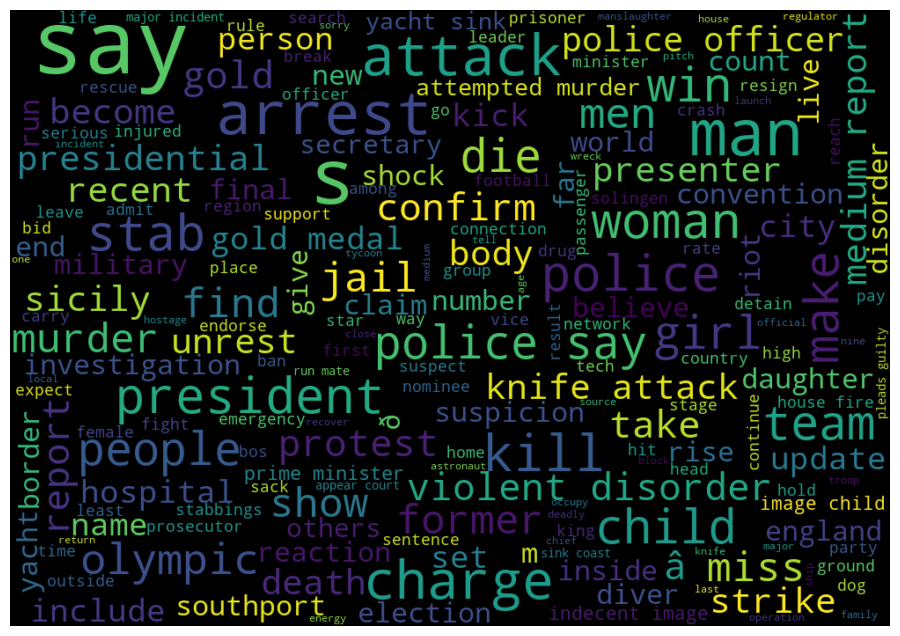

In [248]:
#Frequent words
allWords = " ".join([tweet for tweet in data['Lemmatized Tweet Text']])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [249]:
# function for -ve,+ve and neutral analysis
def polarityAnalysis(point):
    if point < 0:
        return -1  # Negative
    elif point > 0:
        return 1   # Positive
    else:
        return 0   # Neutral

In [250]:
# new column 
data['Analysis Score']=data['Polarity'].apply(polarityAnalysis)
#data
data.head(5)

,Tweet Text,Reply Count,Retweet Count,Like Count,View Count,Lemmatized Tweet Text,Subjectivity,Polarity,Analysis Score
0,woman stole mobility scooter left disabled man...,194,124,582,268510,woman stole mobility scooter leave disabled ma...,0.15,-0.15,-1
1,chief placed formal investigation banned leavi...,149,157,585,325265,chief place formal investigation ban leave cou...,0.00,0.00,0
2,least nine killed launches operation occupied ...,236,168,299,303710,least nine kill launch operation occupy troop ...,0.40,-0.30,-1
3,men charged counts murder one attempted murder...,0,81,314,329494,men charge count murder one attempted murder h...,0.00,0.00,0
4,says rescued hostage held complex operation so...,192,99,616,311600,say rescue hostage hold complex operation sout...,0.20,-0.15,-1


### Positive tweets

In [251]:
positiveTweets = data[data['Analysis Score'] == 1]
i=1
for tweet in positiveTweets['Lemmatized Tweet Text']:
    print(str(i) + ')' + tweet)
    i=i+1

1)major incident declare search rescue continue fire block flat
2)family release first picture daughter body find sicily yacht wreckage
3)place house arrest prosecutor probe new human traffic sexual exploitation allegation
4)drug slow progression early stage alzheimer 's approved regulator available
5)article originally report police tell charge cyber terrorism . police since confirm arrest charge updated article make clear .
6)presenter say diagnosed cancer expect make full recovery
7)body man recover near yacht believe chef
8)miss sailboat mostly passengers sink coast
9)âhannah everything live forâ mum girl dairy allergy die drink speaks inquest find âfailuresâ
10)paetongtarn shinawatra 37 becomes 's young ever prime minister vote parliament
11)man charge attempted murder police officer stab high security england
12)top level result across time since grade mark *
13)'s hot day year far 34.8c reach say
14)man arrest girl woman stab 's take major trauma centre
15)set star stud 

In [252]:
#percentage of +ve tweets
round((positiveTweets.shape[0]/data.shape[0])*100,1)

23.0

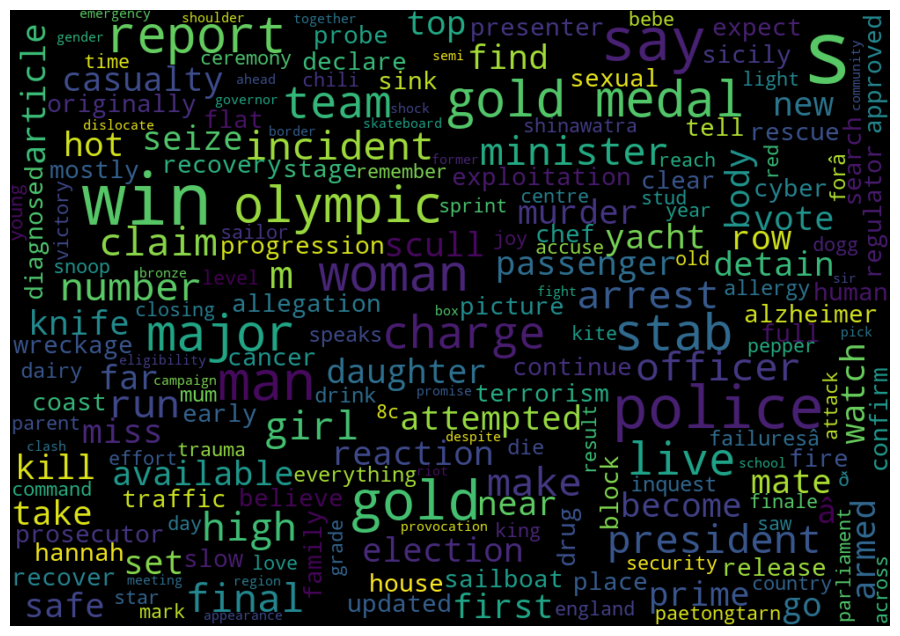

In [253]:
#Frequent words for +ve words
allWords = " ".join( tweet for tweet in positiveTweets['Lemmatized Tweet Text'])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [254]:
# Negative tweets
negativeTweets = data[data['Analysis Score'] == -1]
i=1
for tweet in negativeTweets['Lemmatized Tweet Text']:
    print(str(i) + ')' + tweet)
    i=i+1

1)woman stole mobility scooter leave disabled man die freeze weather jail
2)least nine kill launch operation occupy troop surround hospital
3)say rescue hostage hold complex operation southern
4)arrest stab woman believe caught fight group men notting hill carnival
5)least three people kill injured wave strike hit key energy target
6)police say person arrest connection solingen knife attack age rule terrorist motive
7)police say person detain possible connection deadly knife attack city solingen
8)number people report killed knife attack western city solingen local medium say
9)sack presenter say sorry ashamed sent inappropriate message colleague
10)typical household energy bill rise new price cap set regulator
11)police hunt bulldog type dog man find dead suspected attack house
12)victim die house fire name police child denisty nine oscar
13)authority arrest man suspicion cyber terrorism relation disinformation think fuel unrest
14)people include child die house fire man arrest suspic

In [255]:
#percentage of -ve tweets
round((negativeTweets.shape[0]/data.shape[0])*100,1)

31.0

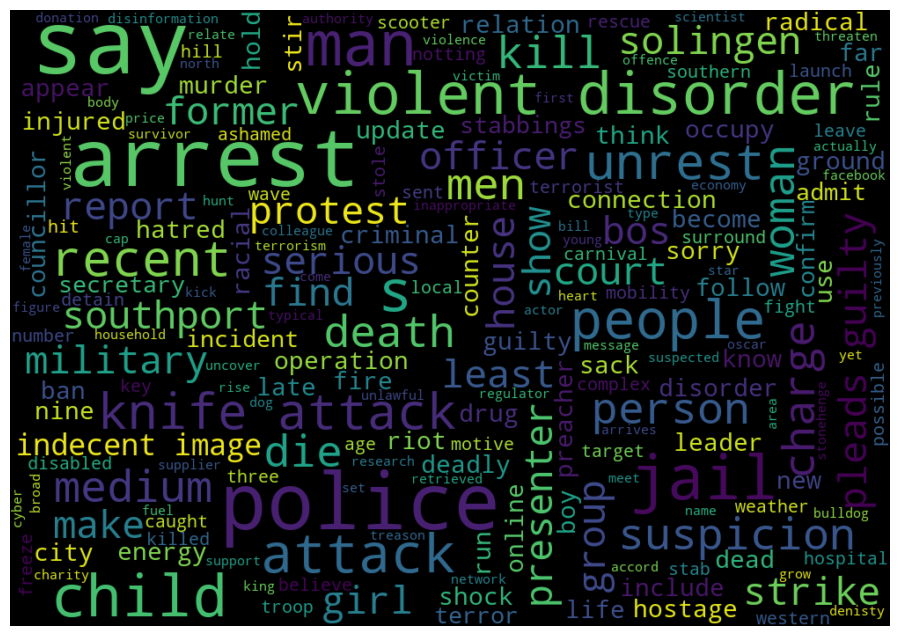

In [256]:
#Frequent words for -ve words
allWords = " ".join( tweet for tweet in negativeTweets['Lemmatized Tweet Text'])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [257]:
# Neutarl tweets
neutarlTweets = data[data['Analysis Score'] == 0]
i=1
for tweet in neutarlTweets['Lemmatized Tweet Text']:
    print(str(i) + ')' + tweet)
    i=i+1


1)chief place formal investigation ban leave country prosecutor say
2)men charge count murder one attempted murder house fire kill mother child
3)say make advance incursion control settlement
4)oasis reunite world tour kick band break
5)former football manager die age
6)astronaut whose mission get stuck space return spacex ship say
7)investigation sicily yacht death consider multiple option include manslaughter official say
8)suspends independent presidential bid support
9)diver find body last person miss yacht sink sicily believe medium report
10)man 32 charge murder death parcel delivery driver carol kondor leeds england
11)make pitch âall americansâ accept nomination president
12)show presenter sack workplace conduct source say
13)tech tycoon body recover sicily wreck daughter believe still miss source close family tell
14)gcse pas rate across fall run grade mark
15)student get result
16)take convention stage report could appear
17)vice presidential nominee nancy pelosi speak pa

In [258]:
#percentage of neutral tweets
round((neutarlTweets.shape[0]/data.shape[0])*100,1)

46.0

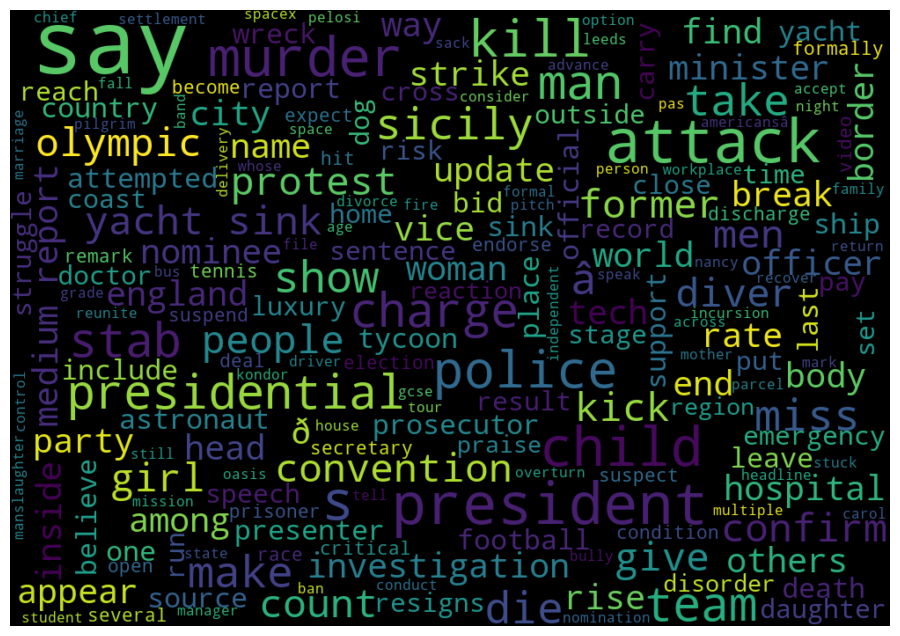

In [259]:
#Frequent words for +ve words
allWords = " ".join( tweet for tweet in neutarlTweets['Lemmatized Tweet Text'])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Plot polarity and subjectivity

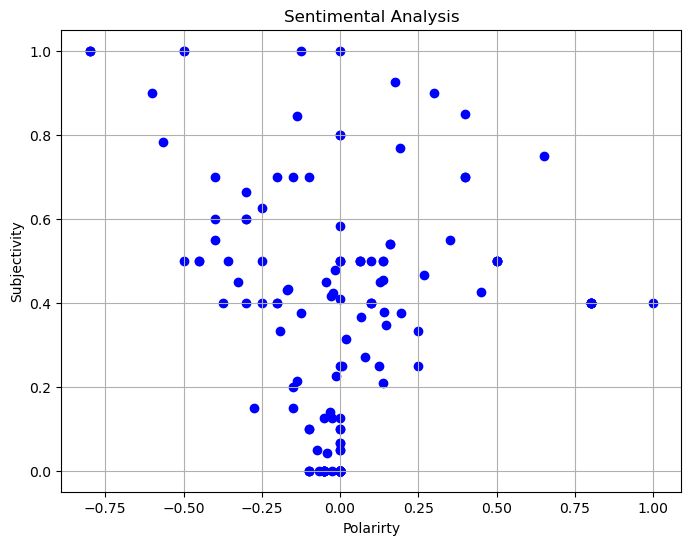

In [260]:
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
    plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color='Blue')
plt.title('Sentimental Analysis')
plt.xlabel('Polarirty')
plt.ylabel('Subjectivity')
plt.grid(True) 
plt.show()

###  Plot sentiment distribution 

<Axes: title={'center': 'Sentimental Analysis'}, xlabel='Analysis Score', ylabel='Count'>

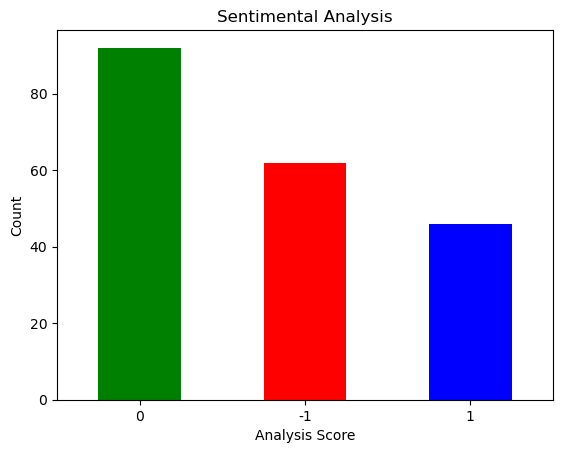

In [261]:
data['Analysis Score'].value_counts()
#plot graph
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
data['Analysis Score'].value_counts().plot(kind='bar',color=['green', 'red', 'blue'],rot =0)

### Obervation:
### Most of the tweets are Neutral.
### Positive tweets are the least.


In [280]:
data.head(5)

,Tweet Text,Reply Count,Retweet Count,Like Count,View Count,Lemmatized Tweet Text,Subjectivity,Polarity,Analysis Score
0,woman stole mobility scooter left disabled man...,194,124,582,268510,woman stole mobility scooter leave disabled ma...,0.15,-0.15,-1
1,chief placed formal investigation banned leavi...,149,157,585,325265,chief place formal investigation ban leave cou...,0.00,0.00,0
2,least nine killed launches operation occupied ...,236,168,299,303710,least nine kill launch operation occupy troop ...,0.40,-0.30,-1
3,men charged counts murder one attempted murder...,0,81,314,329494,men charge count murder one attempted murder h...,0.00,0.00,0
4,says rescued hostage held complex operation so...,192,99,616,311600,say rescue hostage hold complex operation sout...,0.20,-0.15,-1


## Distribution of  sentiments w:r:t  sum of like,view,retweet,reply

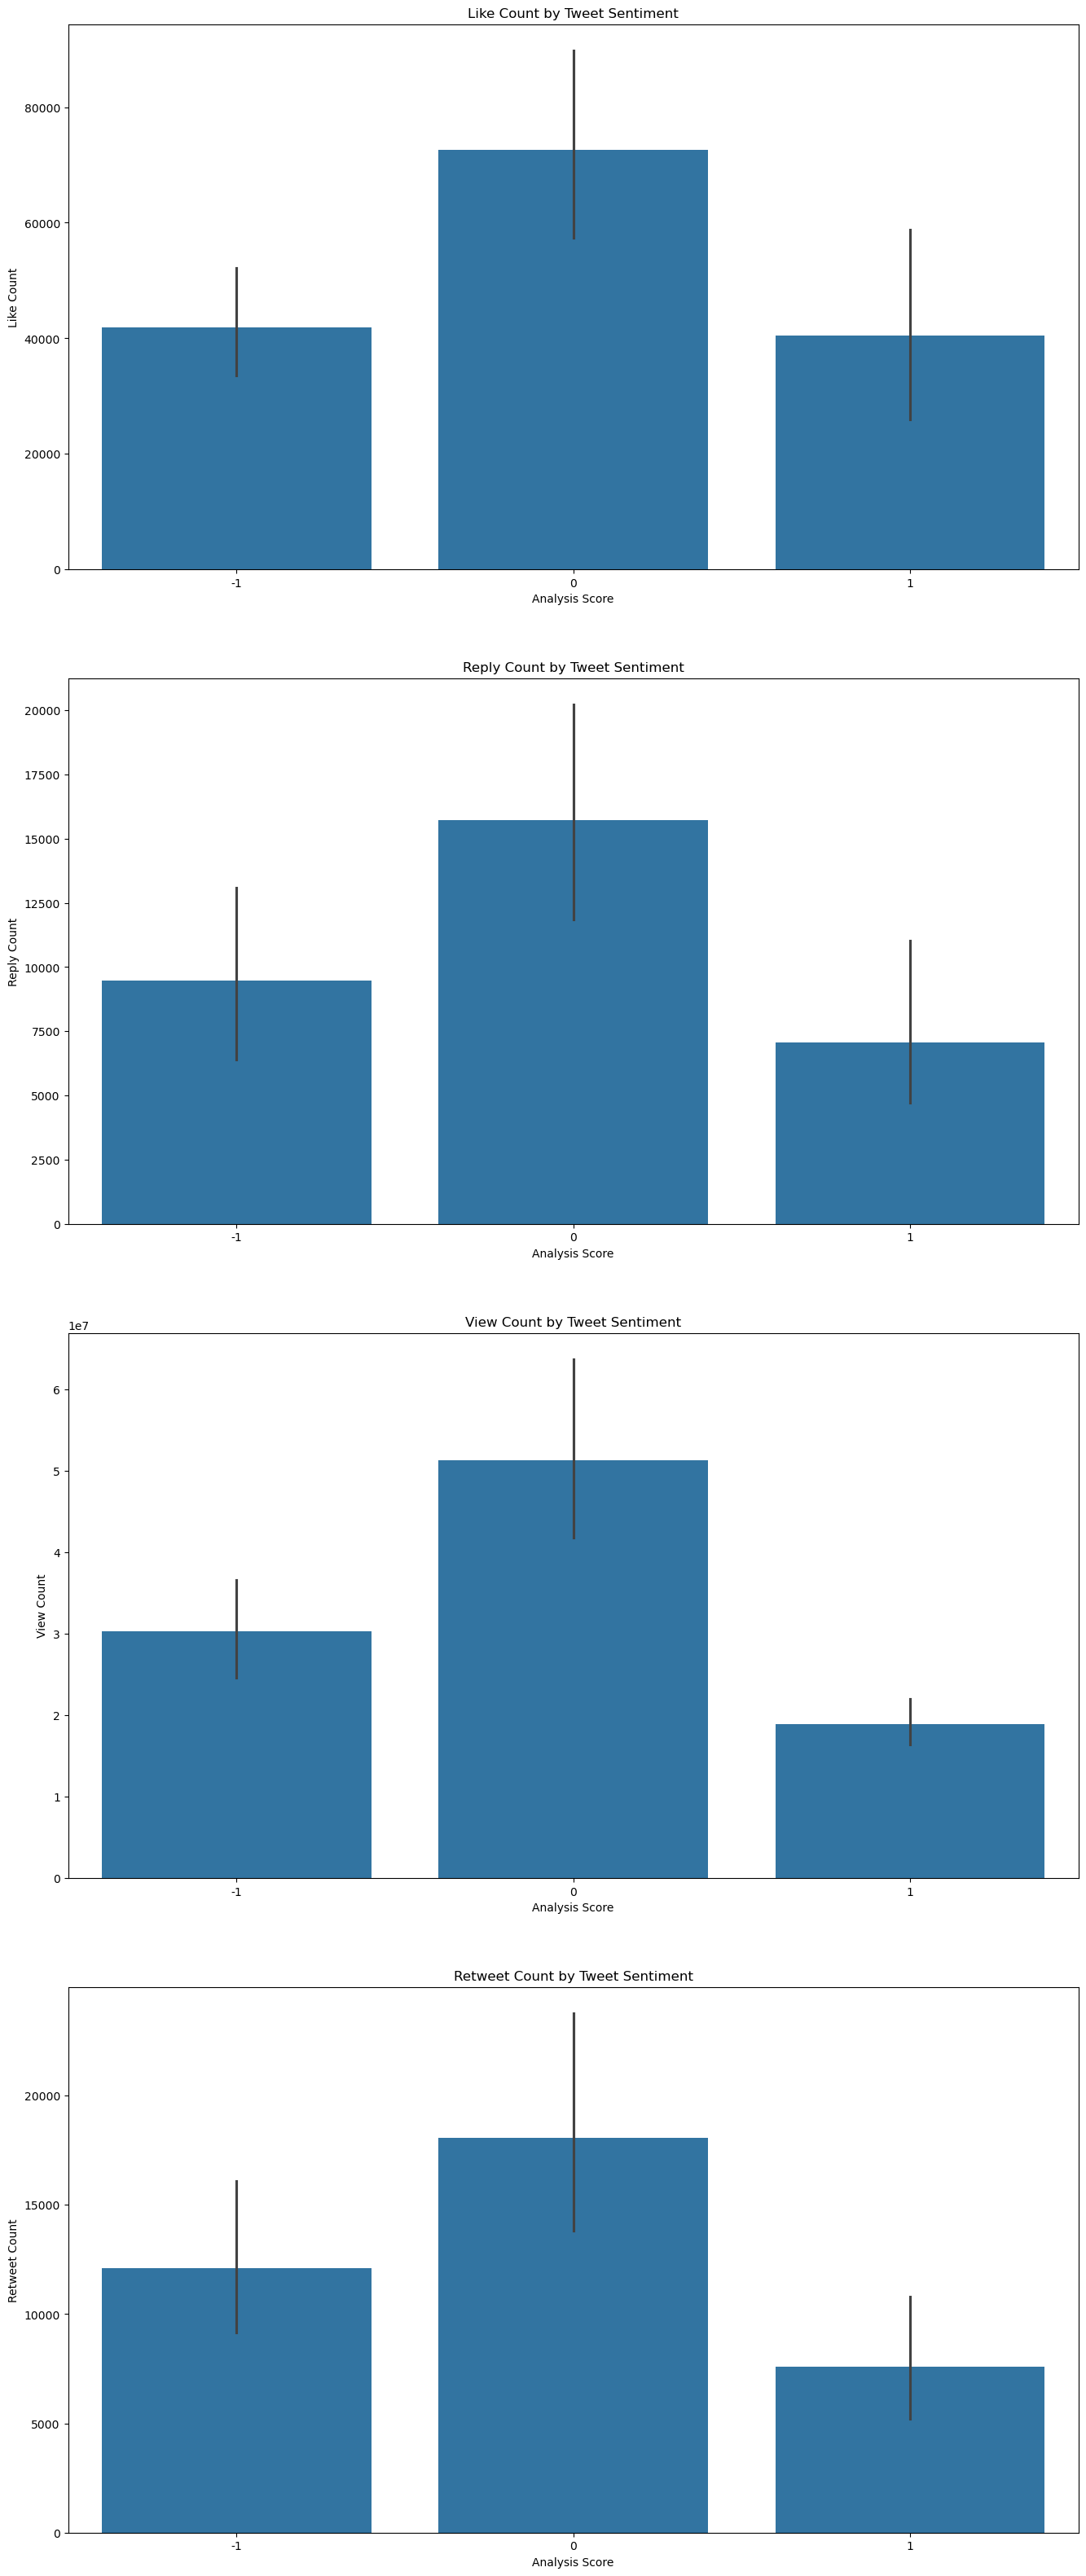

In [299]:
fig, n = plt.subplots(4, 1, figsize=(16, 40))
n[0].set_title('Like Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='Like Count', estimator=sum, ax=n[0])

n[1].set_title('Reply Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='Reply Count',estimator=sum, ax=n[1])

n[2].set_title('View Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='View Count',estimator=sum, ax=n[2])

n[3].set_title('Retweet Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='Retweet Count',estimator=sum, ax=n[3])

plt.show()

In [304]:
# Distribution of sentiments w:r:t average of like,view,retweet,reply

fig, n = plt.subplots(4, 1, figsize=(16, 40))
n[0].set_title(' Average like Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='Like Count', estimator=np.mean, ax=n[0])

n[1].set_title('Average reply Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='Reply Count',estimator=np.mean, ax=n[1])

n[2].set_title('Average view Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='View Count',estimator=np.mean, ax=n[2])

n[3].set_title('Average retweet Count by Tweet Sentiment')
sns.barplot(data=data, x='Analysis Score', y='Retweet Count',estimator=np.mean, ax=n[3])

plt.show()

# Model Building

In [263]:
#seperating Analysis Score and Lemmatized Tweet Text
X= data['Lemmatized Tweet Text'].values
Y=data['Analysis Score'].values

In [264]:
print(X)

['woman stole mobility scooter leave disabled man die freeze weather jail'
 'chief place formal investigation ban leave country prosecutor say'
 'least nine kill launch operation occupy troop surround hospital'
 'men charge count murder one attempted murder house fire kill mother child'
 'say rescue hostage hold complex operation southern'
 'say make advance incursion control settlement'
 'arrest stab woman believe caught fight group men notting hill carnival'
 'oasis reunite world tour kick band break'
 'former football manager die age'
 'least three people kill injured wave strike hit key energy target'
 'major incident declare search rescue continue fire block flat'
 'astronaut whose mission get stuck space return spacex ship say'
 'police say person arrest connection solingen knife attack age rule terrorist motive'
 'police say person detain possible connection deadly knife attack city solingen'
 'investigation sicily yacht death consider multiple option include manslaughter offici

In [265]:
print(Y)

[-1  0 -1  0 -1  0 -1  0  0 -1  1  0 -1 -1  0 -1 -1  0  1  0  0 -1  0  1
  0  0 -1  1  0  0  0  0  0 -1  0 -1  1 -1  1  0  0  0  1  0 -1 -1  0  0
  0  0  0  1  0  0  1  0  1 -1  0 -1  0  1 -1  0 -1  1 -1  0  0 -1 -1  0
  0 -1  0  0  1  0  1 -1  0  0  1  0  0  1  0  0 -1 -1  0  0  1 -1  1  1
 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  0  1 -1  0 -1  1 -1  0  1 -1  0  0
  1  0  0  0  0 -1 -1  1  0  1 -1  1  0  0  0  0  0  1  0 -1  0 -1  0 -1
  1  1 -1 -1  0  0 -1  0 -1 -1 -1  1  0 -1  0  1  0  1  1  0  0  0 -1  0
  0 -1 -1  1 -1  0 -1  0  0  0  1  0  1 -1  0  0  1 -1  0 -1  1 -1  0  1
  1 -1 -1  0  0  0  0  0]


In [266]:
# spliting data to training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=100)

In [267]:
print(X.shape,X_train.shape,X_test.shape)

(200,) (160,) (40,)


In [268]:
#converting text data to numerical data
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [269]:
print(X_train)

  (0, 71)	0.30397714056357467
  (0, 173)	0.3488538096432952
  (0, 545)	0.3226026410743861
  (0, 179)	0.3226026410743861
  (0, 351)	0.3226026410743861
  (0, 37)	0.2102987614205699
  (0, 565)	0.30397714056357467
  (0, 96)	0.3488538096432952
  (0, 322)	0.2895300799818496
  (0, 318)	0.2895300799818496
  (0, 109)	0.21840224233321992
  (1, 37)	0.15630895513416074
  (1, 39)	0.5185857882525907
  (1, 439)	0.25929289412629536
  (1, 526)	0.16921831396637493
  (1, 472)	0.26809331250280577
  (1, 647)	0.2397811637559445
  (1, 104)	0.33843662793274987
  (1, 160)	0.2397811637559445
  (1, 651)	0.2397811637559445
  (1, 581)	0.1869139100036737
  (1, 134)	0.22593737074437545
  (1, 679)	0.25929289412629536
  (1, 376)	0.17725726526460583
  (1, 115)	0.25929289412629536
  :	:
  (157, 78)	0.3819444936928594
  (157, 190)	0.3819444936928594
  (157, 576)	0.3819444936928594
  (158, 480)	0.23465339668652477
  (158, 451)	0.28364379880849067
  (158, 58)	0.2701631168814894
  (158, 496)	0.30102342054518216
  (158, 628)

In [270]:
print(X_test)

  (0, 45)	0.3297348951714775
  (0, 196)	0.5469802749948635
  (0, 255)	0.41980805407865585
  (0, 313)	0.4766165520956407
  (0, 378)	0.3297348951714775
  (0, 472)	0.28277241127487834
  (1, 45)	0.30222161905852196
  (1, 191)	0.3613959574957428
  (1, 393)	0.37235485107815514
  (1, 564)	0.5013399149521457
  (1, 677)	0.4636142021924419
  (1, 686)	0.41608542507421115
  (2, 14)	0.5075414648878889
  (2, 396)	0.4040587855632566
  (2, 442)	0.46934908692846095
  (2, 485)	0.44225116352268445
  (2, 491)	0.4040587855632566
  (3, 15)	0.4439524323420891
  (3, 41)	0.4439524323420891
  (3, 215)	0.41054511438874364
  (3, 378)	0.26762685133539027
  (3, 564)	0.4439524323420891
  (3, 677)	0.41054511438874364
  (4, 480)	0.8607306465405126
  (4, 550)	0.5090606585721894
  :	:
  (34, 465)	0.3877438046662729
  (34, 490)	0.3877438046662729
  (34, 550)	0.16530962600185364
  (35, 9)	0.5311958842994481
  (35, 304)	0.4912235167449303
  (35, 320)	0.4408642893265432
  (35, 415)	0.5311958842994481
  (36, 37)	0.3022525876

In [271]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [272]:
# Accuracy score on training data
X_trainPred=model.predict(X_train)
trainingDataAccuracy=accuracy_score(Y_train,X_trainPred)
print("Accuracy score on training data =",dataAccuracy)

Accuracy score on training data = 0.95625


In [273]:
# Accuracy score on test data
X_testPred=model.predict(X_test)
testDataAccuracy=accuracy_score(Y_test,X_testPred)
print("Accuracy score on test data =",testDataAccuracy)

Accuracy score on test data = 0.7


 ## Model Accuracy = 70%

In [275]:
print("\nClassification Report :\n")
print(classification_report(Y_test, X_testPred))


Classification Report :

              precision    recall  f1-score   support

          -1       0.86      0.46      0.60        13
           0       0.62      1.00      0.77        18
           1       1.00      0.44      0.62         9

    accuracy                           0.70        40
   macro avg       0.83      0.64      0.66        40
weighted avg       0.78      0.70      0.68        40



#
<h2>Observartion</h2>
<h3>Negative Class:</h3>
<b>Precision:</b> 0.86 ( 86% of the predicted negative instances are actually negative)<br>
<b>Recall:</b> 0.46 (Only 46% of the actual negative instances are correctly identified)<br>
<b>F1-Score:</b> 0.60 (Harmonic mean of precision and recall, indicating room for improvement)<br>
<h3>Neutral Class:</h3>
<b>Precision:</b> 0.62 (62% of the predicted neutral instances are correct)<br>
<b>Recall:</b> 1 (100% of the actual neutral instances are correctly identified)<br>
<b>F1-Score:</b> 0.77 (Balanced performance, but precision could be improved)
<h3>Positive Class:</h3>
<b>Precision:</b> 1.00 (All predicted positive instances are correct)<br>
<b>Recall:</b> 0.44 (Only 44% of the actual positive instances are identified)<br>
<b>F1-Score:</b> 0.62 (Indicates a significant imbalance between precision and recall)<br>
<h2>Overall Metrics:</h2>
<b>Accuracy:</b> 0.70 (70% of the total instances are correctly classified)<br>
<b>Macro Average:</b>  Averages the metrics for each class, showing overall performance across classes.<br>
<b>Weighted Average:</b> Takes into account the support (number of instances) for each class, providing a more balanced view.
<br>
<h2>Conclusion:</h2>
The model performs better on Neutral tweets but struggles with Positive and Negative tweets.<br>
The overall accuracy and F1-scores suggest that the model has room for improvement, especially in distinguishing between Negative and Positive sentiments.<br>

### saving the trained model

In [224]:
import pickle
pickle.dump(model,open('trainedModel.sav','wb'))